# In this example we use the MdB class to access a database of models. 

The dabase is 3MdB, described here: https://sites.google.com/site/mexicanmillionmodels/the-different-projects/hii_chim

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Defining the connection parameters.
import os
host = os.environ['MdB_HOST']
user = os.environ['MdB_USER']
passwd = os.environ['MdB_PASSWD']
db=os.environ['MdB_DB_17']    

In [4]:
request = """SELECT
12+oxygen AS OH, 
nitrogen-oxygen AS NO, 
lumi AS logU, 
BLND_372700A/H__1_486133A AS O2, 
BLND_436300A/H__1_486133A AS O3_4363, 
O__3_500684A/H__1_486133A AS O3, 
N__2_658345A/H__1_486133A AS N2, 
(S__2_671644A + S__2_673082A)/H__1_486133A AS S2
FROM tab_17
WHERE ref = 'BOND'
"""
sqlEngine = create_engine(f'mysql+pymysql://{user}:{passwd}@{host}:{3306}/{db}')

with sqlEngine.connect() as db_con:
    res = pd.read_sql(request, con=db_con)


In [5]:
print(len(res))

113420


In [6]:
res

,OH,NO,logU,O2,O3_4363,O3,N2,S2
0,8.2,-1.00,52.262277,0.443831,4.624517e-02,5.087498,0.036771,0.032356
1,8.2,-1.00,52.262277,0.008498,1.901961e-02,2.643664,0.000310,0.000058
2,8.2,-1.00,52.262277,0.015441,2.126387e-02,3.163863,0.000741,0.000250
3,8.2,-1.00,52.262277,0.023099,2.288621e-02,3.464117,0.001255,0.000568
4,8.2,-1.00,52.262277,0.032308,2.443923e-02,3.692262,0.001887,0.001034
...,...,...,...,...,...,...,...,...
113415,9.4,-0.25,47.532553,0.029679,4.341928e-11,0.000002,0.354148,0.142798
113416,9.2,-0.25,47.532553,0.104207,9.519672e-10,0.000018,1.095120,0.418765
113417,9.2,-0.25,47.532553,0.948997,1.291271e-05,0.042813,4.489167,1.296916
113418,9.2,-0.25,47.532553,0.435569,1.489141e-06,0.009202,2.744305,0.869078


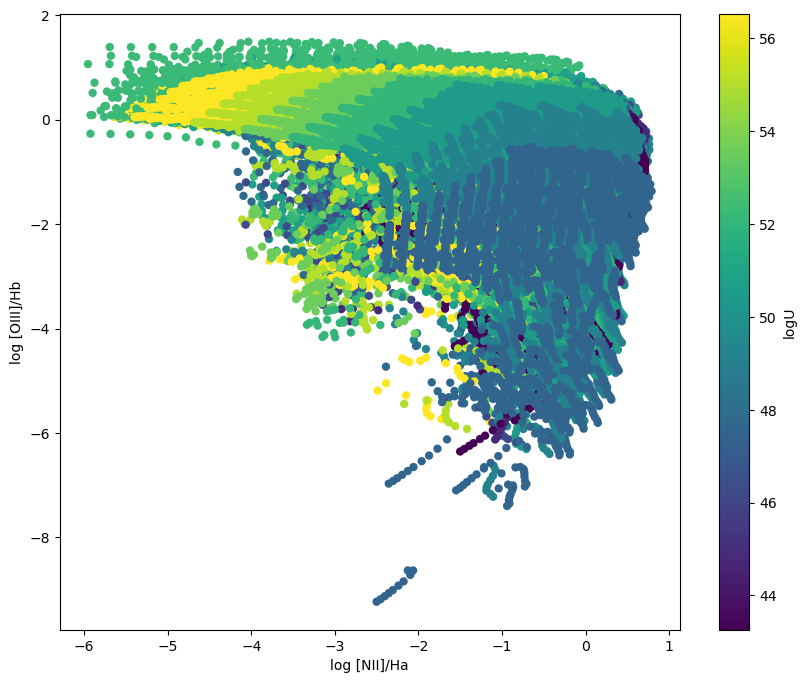

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['logU'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('logU');

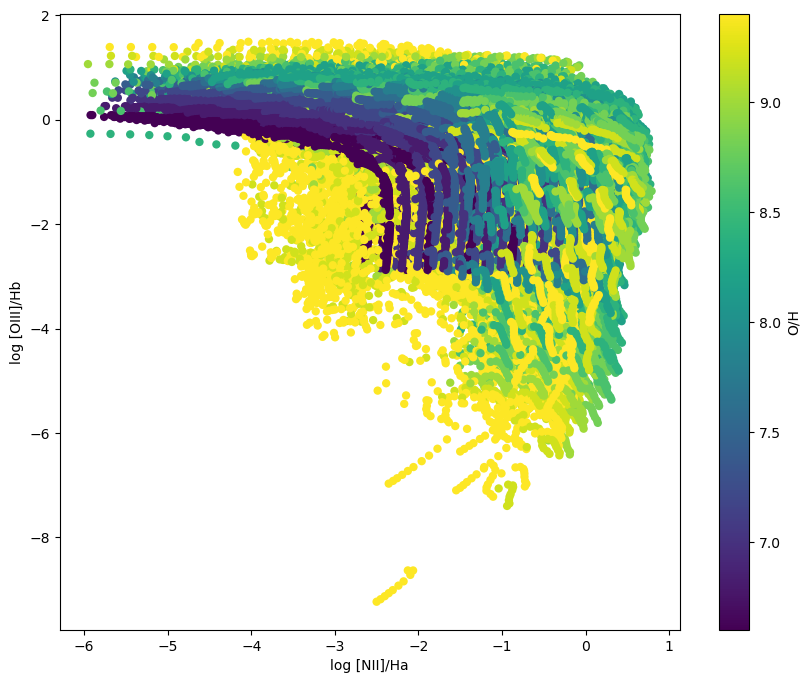

In [8]:
plt.figure(figsize=(10, 8))
plt.scatter(np.log10(res['N2']), np.log10(res['O3']), c=res['OH'], edgecolor = 'none')
plt.xlabel('log [NII]/Ha')
plt.ylabel('log [OIII]/Hb')
cb = plt.colorbar()
cb.set_label('O/H');

In [13]:
res = pd.read_sql("SELECT count(*) as N FROM tab_17 WHERE ref like 'PNe_2020'", con=co)
print("Total number of models with ref='PNe_2020': {}".format(res.N.values[0]))

Total number of models with ref='PNe_2020': 724386


In [19]:
# Query the database
com1 = 'BB' # Blackbody
com2 = 'C' # Constant density
com4 = 'S' # Solar metallicity
com5 = 'N' # No dust
com6 = 1 # selected models
request = f"""SELECT
    A_HYDROGEN_vol_1, A_HELIUM_vol_1, A_HELIUM_vol_2, A_CARBON_vol_2, A_NITROGEN_vol_1, A_OXYGEN_vol_1,A_OXYGEN_vol_2,
    A_NEON_vol_2, A_NEON_vol_4, A_SULPHUR_vol_1, A_SULPHUR_vol_2, A_CHLORINE_vol_1, A_CHLORINE_vol_2, A_CHLORINE_vol_3,
    A_ARGON_vol_2, A_ZINC_vol_3, A_IRON_vol_2, A_NICKEL_vol_2, MassFrac, atm1
FROM tab_17, abion_17
WHERE tab_17.ref like 'PNe_2020'
    AND tab_17.N = abion_17.N
    AND com1 = '{com1}'
    AND com2 = '{com2}'
    AND com4 = '{com4}'
    AND com5 = '{com5}' 
    AND com6 = {com6}
    """
with sqlEngine.connect() as db_con:
    res = pd.read_sql(request, con=db_con)

In [17]:
print(request)

SELECT
    A_HYDROGEN_vol_1, A_HELIUM_vol_1, A_HELIUM_vol_2, A_CARBON_vol_2, A_NITROGEN_vol_1, A_OXYGEN_vol_1,A_OXYGEN_vol_2,
    A_NEON_vol_2, A_NEON_vol_4, A_SULPHUR_vol_1, A_SULPHUR_vol_2, A_CHLORINE_vol_1, A_CHLORINE_vol_2, A_CHLORINE_vol_3,
    A_ARGON_vol_2, A_ZINC_vol_3, A_IRON_vol_2, A_NICKEL_vol_2, MassFrac, atm1
FROM tab_17, abion_17
WHERE tab_17.ref like 'PNe_2020'
    AND tab_17.N = abion_17.N
    AND com1 like 'B_'
    AND com2 like 'C_'
    AND com4 = 'S'
    AND com5 = 'N' 
    AND com6 = 1
    


In [20]:
print(len(res))

8380


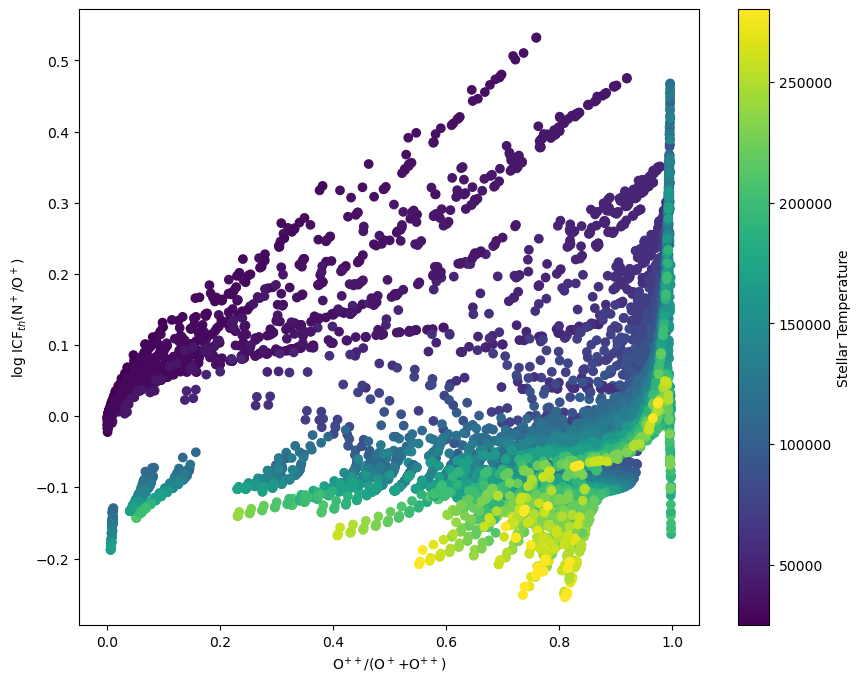

In [21]:
plt.figure(figsize=(10, 8))
plt.scatter(res['A_OXYGEN_vol_2']/(res['A_OXYGEN_vol_1']+res['A_OXYGEN_vol_2']), 
                np.log10(res['A_OXYGEN_vol_1']/res['A_NITROGEN_vol_1']), c=res['atm1'])
plt.xlabel(r'O$^{++}$/(O$^+$+O$^{++}$)')
plt.ylabel(r'log ICF$_{th}$(N$^+$/O$^+$)')
cb = plt.colorbar()
cb.set_label('Stellar Temperature')